<a href="https://colab.research.google.com/github/albreyes/python/blob/main/grafos_y_redes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Redes![networkx-layout.png](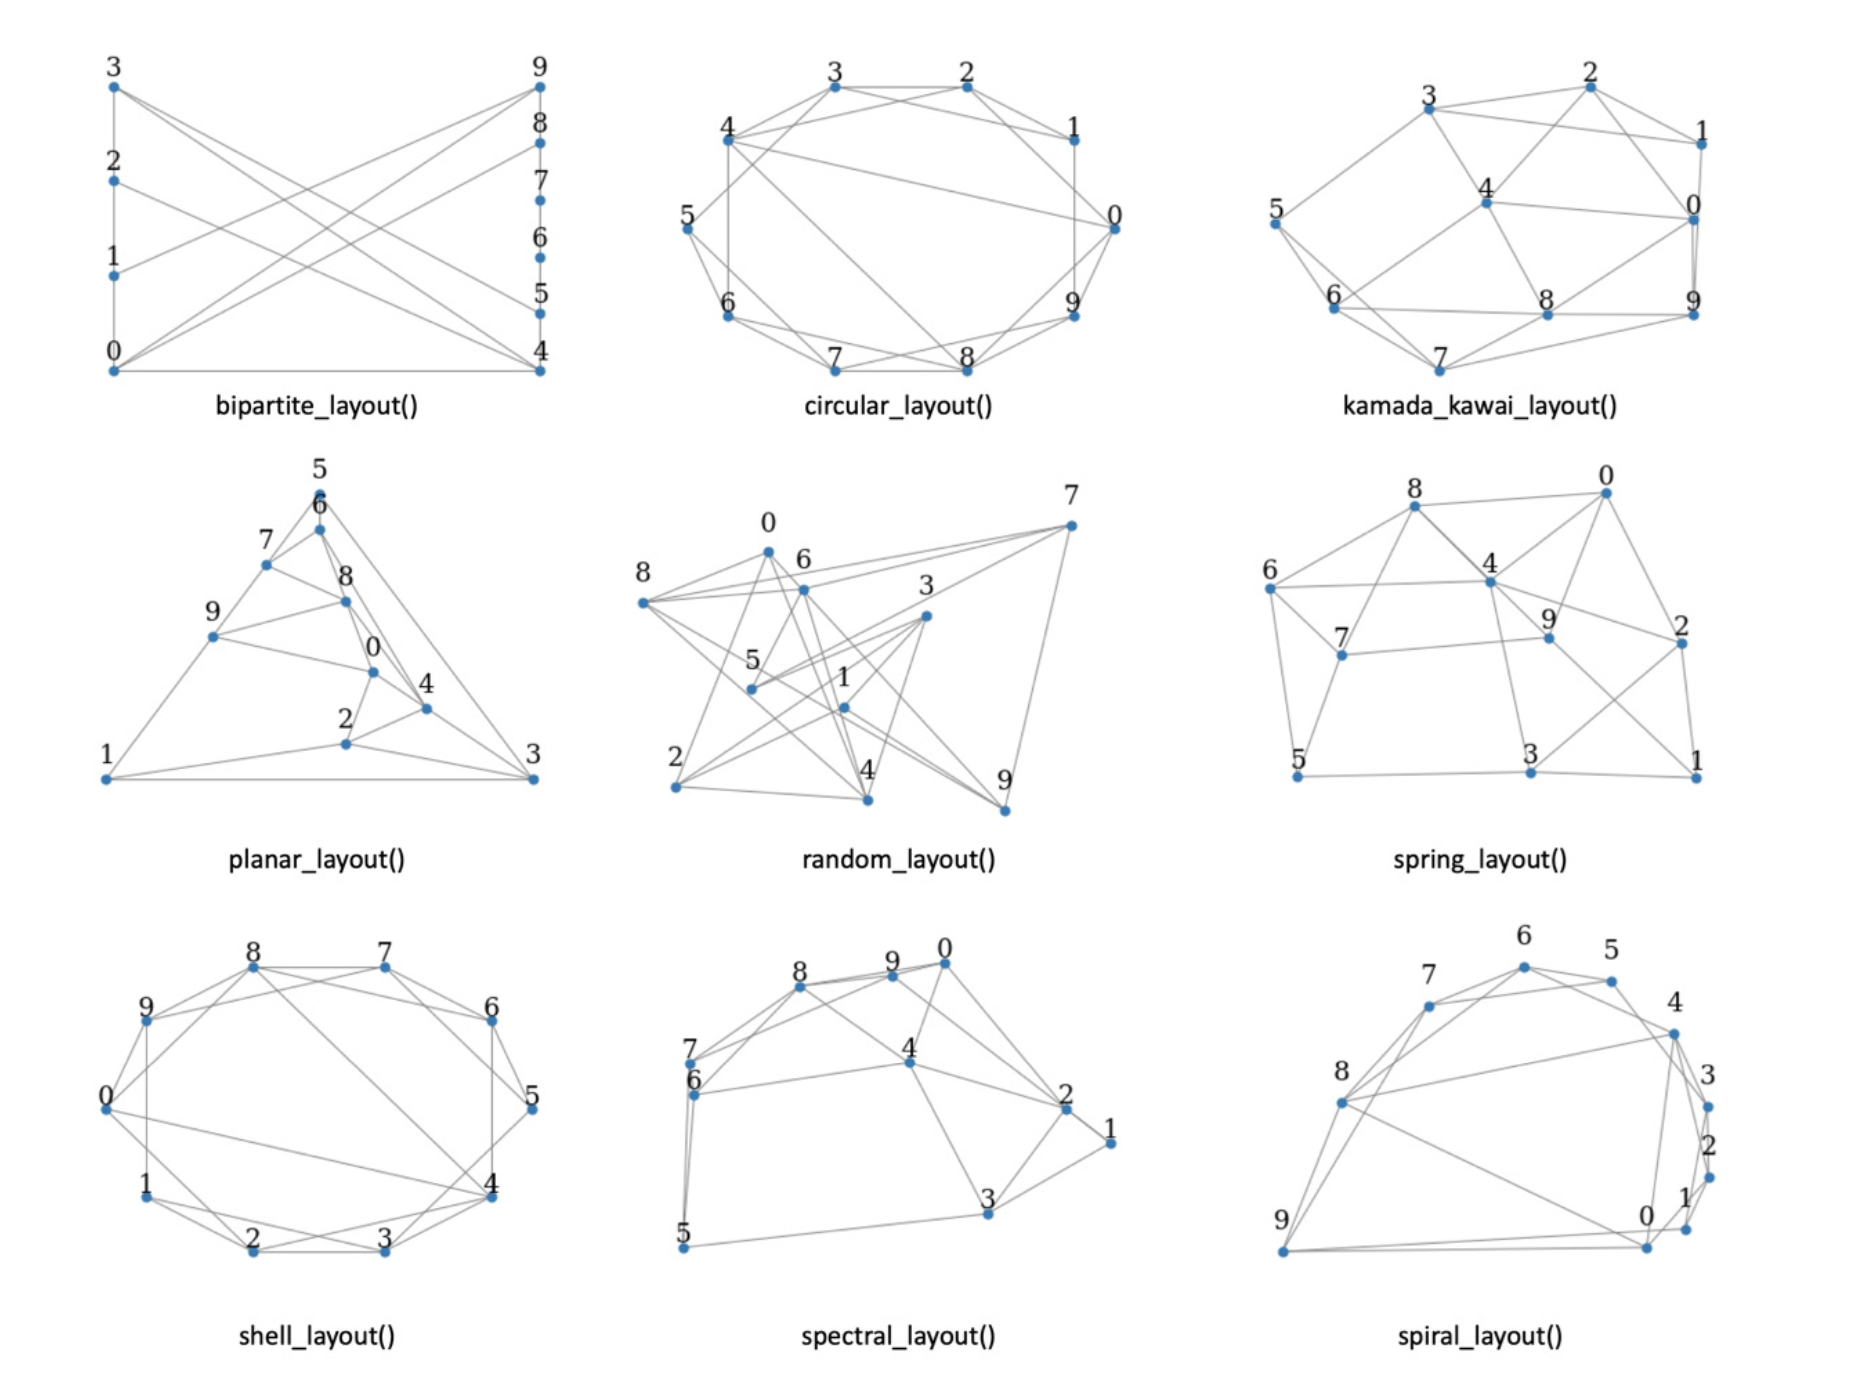![screen2.jpg](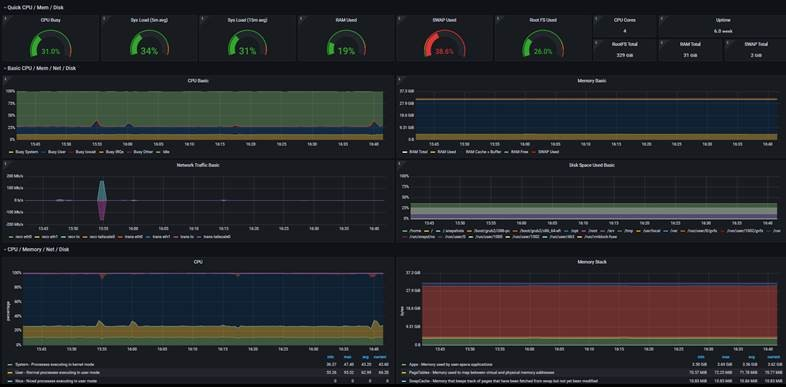![IMG-20220627-WA0007.jpg](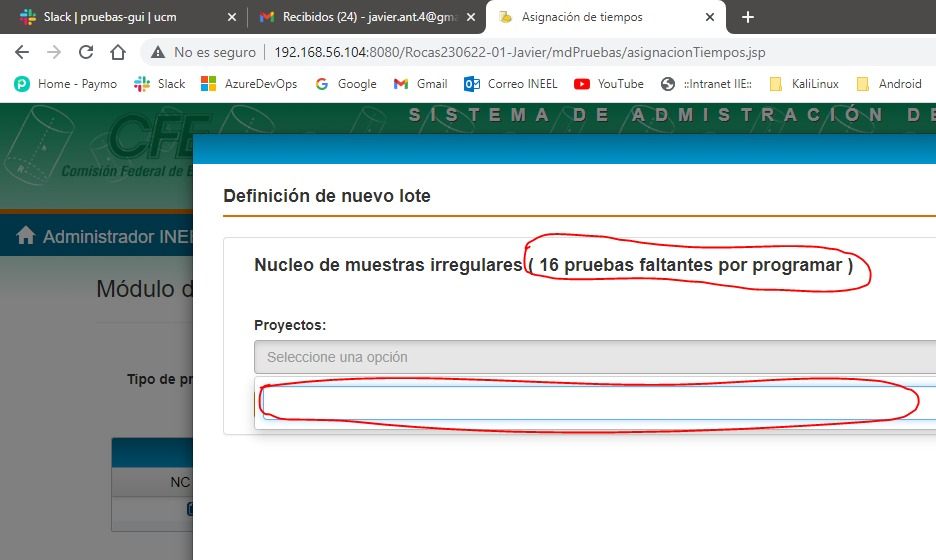![macAbout.jpg](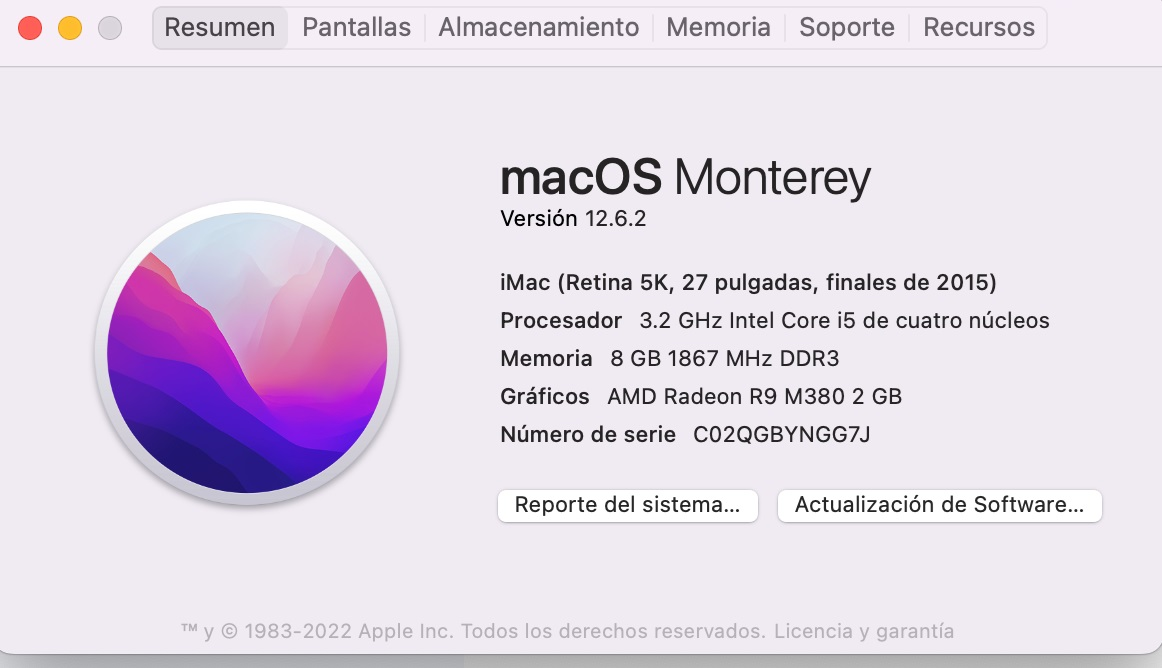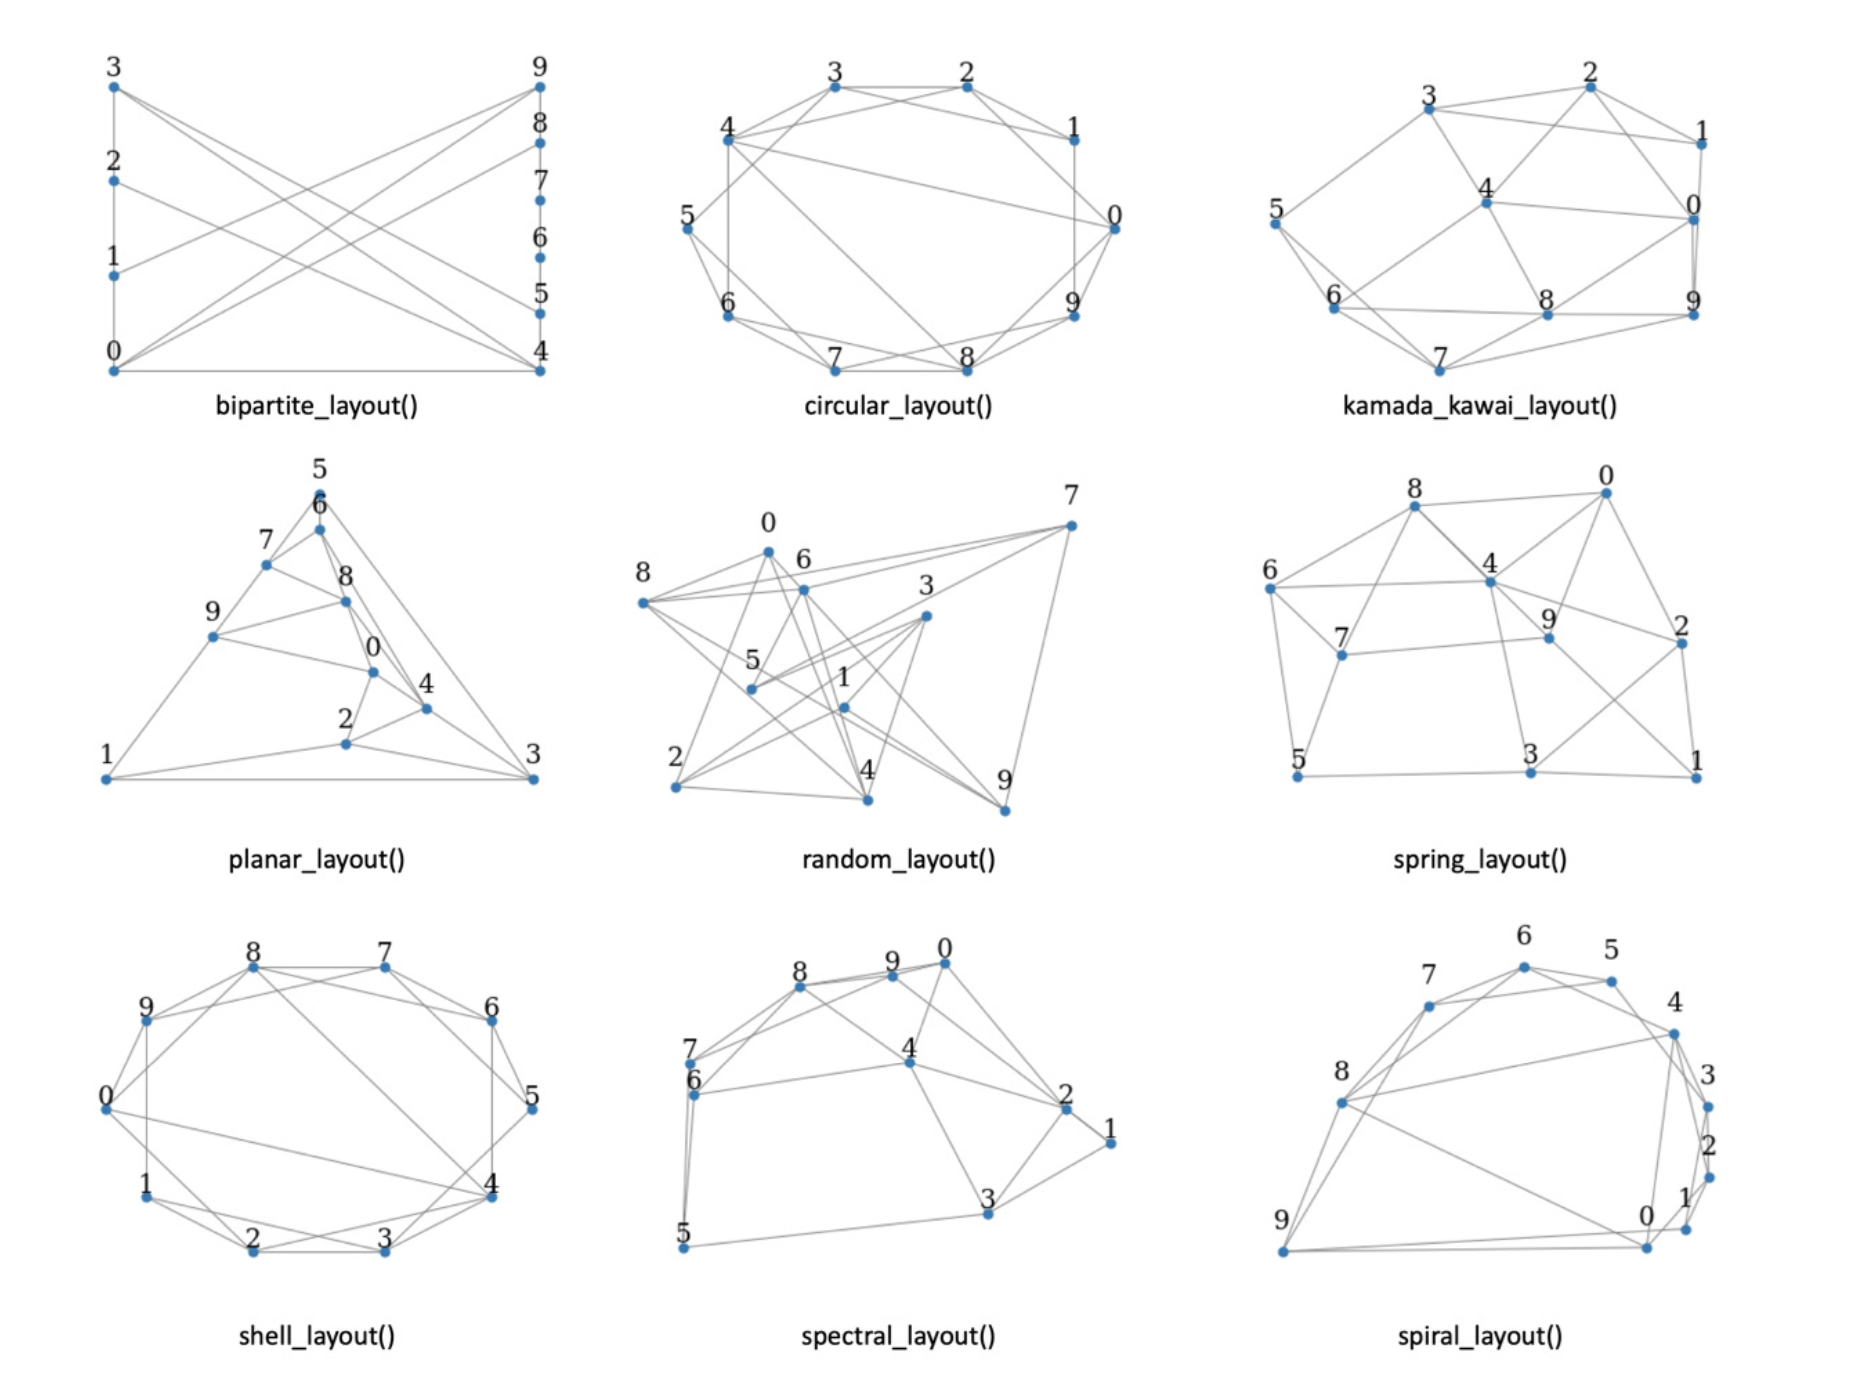))))**

##**Creación de grafos no dirigidos**

NetworkX permite crear redes de manera manual, añadiendo los nodos y ejes uno por uno o desde un archivo o un DataFrame que contenga las conexiones. Esto último es especialmente útil cuando se trabaja con datos de redes que ya han sido recopilados y se encuentran en un formato estructurado.

###**Creación manual**

In [ ]:
# Librerías
# ======================================================================================
import networkx as nx
import pandas as pd
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings("ignore")

Para crear un grafo en NetworkX, se debe crear un objeto de tipo "Grafo" utilizando la función nx.Graph(). Esta función crea un grafo vacío, sin nodos ni ejes, al que se pueden agregar elementos más adelante.

In [ ]:
# Creación de una instancia de tipo "Grafo"
# ======================================================================================
G = nx.Graph()
print(G)

Graph with 0 nodes and 0 edges


Se verifica que es un grafo no dirigido.


In [ ]:
G.is_directed()

False

Una vez que el objeto Grafo ha sido creado, se puede poblar con nodos y conexiones. Para ello se utilizan dos métodos:

* add_node: añade un único nodo al grafo.
* add_nodes_from: añade multiples nodos al grafo.
* add_edge: añade un eje entre los nodos u y v. Si los nodos no existen, se crean y añaden automáticamente al grafo.
* add_edges_from: mismo comportamiento que add_edge pero utilizando una colección de ejes. Cada eje se define con una tupla (u, v).

El nombre de los nodos puede ser tanto de numérico como caracteres.

Graph with 1 nodes and 0 edges


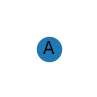

In [ ]:
# Añadir un único nodo
# ======================================================================================
fig, ax = plt.subplots(figsize=(1,1))
G.add_node("A")
nx.draw(G, with_labels=True, ax=ax)
print(G)

Graph with 3 nodes and 0 edges


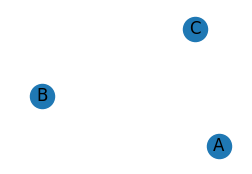

In [ ]:
# Añadir multiples nodos
# ======================================================================================
G.add_nodes_from(["B", "C"])

fig, ax = plt.subplots(figsize=(3, 2))
nx.draw(G, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(G)

Graph with 3 nodes and 1 edges


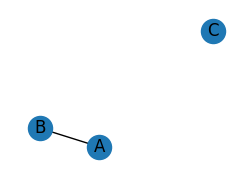

In [ ]:
# Añadir un único eje
# ======================================================================================
G.add_edge("A", "B")

fig, ax = plt.subplots(figsize=(3, 2))
nx.draw(G, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(G)

Graph with 3 nodes and 3 edges


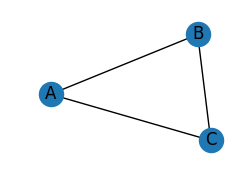

In [ ]:
# Añadir múltiples ejes
# ======================================================================================
G.add_edges_from([("A", "C"), ("B", "C")])

fig, ax = plt.subplots(figsize=(3, 2))
nx.draw(G, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(G)

Si se añade una conexión cuyos nodos no existen, se crean automáticamente.


Graph with 6 nodes and 5 edges


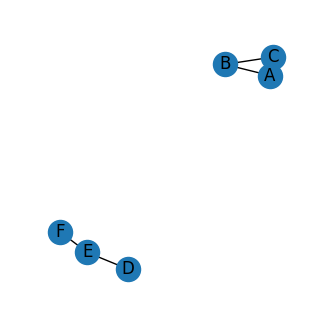

In [ ]:
G.add_edges_from([("D", "E"), ("E", "F")])

fig, ax = plt.subplots(figsize=(4, 4))
nx.draw(G, with_labels=True, ax=ax)
ax.set_xlim([1.2*x for x in ax.get_xlim()])
ax.set_ylim([1.2*y for y in ax.get_ylim()])
print(G)

La matriz de adyacencia correspondiente es:



In [ ]:
adjM = nx.adjacency_matrix(G)

# Se convierte la matriz de formato sparse a dense para poder imprimirla
adjM = adjM.todense()
adjM

array([[0, 1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0, 0],
       [1, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 1, 0]])

Y el número de nodos y ejes:



In [ ]:
print(G.number_of_edges())
print(G.number_of_nodes())

5
6


La información de los nodos y ejes del grafo está almacenada en los attributos *nodes* y *edges*.



In [ ]:
print(f"Nodos del grafo: {G.nodes}")
print(f"Ejes del grafo: {G.edges}")

Nodos del grafo: ['A', 'B', 'C', 'D', 'E', 'F']
Ejes del grafo: [('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'E'), ('E', 'F')]


#**Creación desde un DataFrame**

Para crear un grafo a partir de un dataframe de pandas, la información tiene que estar estructurada de tal forma que una columna represente el incio de cada eje y otra el destino. Por ejemplo, para representar que existen dos nodos ("A" y "B") conectados entre si, se necesita una fila que contenga el valor "A" en una columna y "B" en otra. Esta información es suficiente para que se creen los dos nodos y la conexión entre ambos.

In [ ]:
# Dataframe con las conexiones del grafo
# ======================================================================================
conexiones = pd.DataFrame(
    {
        "inicio": ["A", "B", "C"],
        "fin": ["C", "C", "D"],
    }
)
conexiones

,inicio,fin
0,A,C
1,B,C
2,C,D


En la función *from_pandas_edgelist* se indica la columna de origen y destino (para grafos no dirigidos, se elige un origen indistintamente).

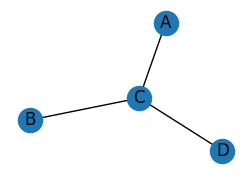

In [ ]:
# Crear un grafo a partir de un Dataframe
# ======================================================================================
fig, ax = plt.subplots(figsize=(3,2))
G = nx.from_pandas_edgelist(conexiones, source="inicio", target="fin")
nx.draw(G, with_labels=True, ax=ax)

##**Creación de grafos dirigidos**

###**Creación manual**¶

Como se ha explicado anteriormente, los enlaces de los grafos dirigidos tienen una dirección definida (los enlaces de estos grafos se representan con una flecha). El proceso de creación de un grafo dirigido es esquivalente al de un grafos no dirigido pero utilizando DiGraph en luigar de Graph.


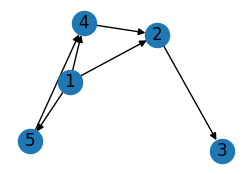

In [ ]:
# Creación de un grafo dirigido".
# ======================================================================================
G = nx.DiGraph()

# Conexiones
G.add_edges_from([(1, 2), (2, 3), (1, 4), (1, 5), (4, 2), (5, 4)])

# Representación gráfica
fig, ax = plt.subplots(figsize=(3,2))
nx.draw(G, with_labels=True, ax=ax)

Se verifica que sí es un grafo dirigido.



In [ ]:
G.is_directed()

True

###**Creación desde un DataFrame**

El proceso de creación de un grafo dirigido desde un DataFrame es equivalente al de los grafos no dirigidos mostrado en el apartado anterior, con la única diferencia de que se ha de indicar el argumento create_using = nx.DiGraph.

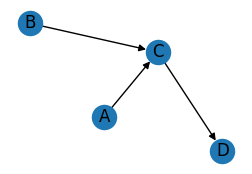

In [ ]:
# Crear un grafo dirigido a partir de un Dataframe
# ======================================================================================
G = nx.from_pandas_edgelist(
    conexiones,
    source = "inicio",
    target = "fin",
    create_using = nx.DiGraph
)
fig, ax = plt.subplots(figsize=(3,2))
nx.draw(G, with_labels=True, ax=ax)

Al tratarse de un grafo dirigido, su matriz de adjacencia no es simétrica.

In [ ]:
adjM = nx.adjacency_matrix(G)
adjM = adjM.todense()
adjM

array([[0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 0, 0],
       [0, 0, 0, 0]])

#**Distancia entre dos nodos**

Para obtener la distancia de orden 2 entre cualquier par de nodos, basta con multiplicar la matriz de adyacencia por sí misma. Si la multiplicamos por sí misma n veces, obtenemos la matriz de distancias de orden n.

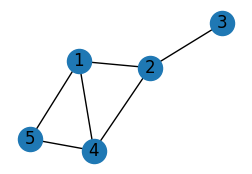

In [ ]:
# Creación del grafo
G = nx.Graph()

# Se añadennodos a grafo
G.add_edges_from([(1, 2), (2, 3), (1, 4), (1, 5), (4, 2), (5, 4)])

# Representación gráfica
fig, ax = plt.subplots(figsize=(3,2))
nx.draw(G, with_labels=True, ax=ax)

In [ ]:
# Matrix de adyacencia
adjM = nx.adjacency_matrix(G).todense()
adjM

array([[0, 1, 0, 1, 1],
       [1, 0, 1, 1, 0],
       [0, 1, 0, 0, 0],
       [1, 1, 0, 0, 1],
       [1, 0, 0, 1, 0]])

La matriz de distancia de orden 2 muestra todos los pares de nodos que están conectados con un nodo intermedio. En el ejemplo, los nodos 2 y 5 tienen entre medias los nodos 4 y 1, es decir, existen dos caminos posibles de orden 2 que los conectan: el 2-4-5 y el 2-1-5. Por ese motivo, si se multiplica la matriz de adyacencia por sí misma, el elemento [2, 5] de la matriz de distancias tiene el valor 2. Lo que indica que existen dos caminos de distancia 2 entre los nodos 2 y 5.

In [ ]:
# Multiplicación de la matriz por sí misma de forma matricial
distancias_orden_dos = adjM @ adjM
distancias_orden_dos

array([[3, 1, 1, 2, 1],
       [1, 3, 0, 1, 2],
       [1, 0, 1, 1, 0],
       [2, 1, 1, 3, 1],
       [1, 2, 0, 1, 2]])

In [ ]:
# Los indices en python empiezan en 0
print(f"Caminos de orden dos entre los nodos 2 y 5 = {distancias_orden_dos[1, 4]}")

Caminos de orden dos entre los nodos 2 y 5 = 2


También se puede calcular el camino más corto (shortest path) utilizando directamente la función nx.shortest_path.

In [ ]:
nx.shortest_path(G, source=2, target=5)

[2, 1, 5]

#**Grafo ponderado**

En un grafo ponderado, los ejes del grafo tienen un peso asociado. En la representación gráfica de este tipo de redes, los ejes se suelen mostrar con una anchura distinta en función de su peso.

In [ ]:
# Creacion del grafo
G = nx.Graph()

# Nodos y vonexiones
G.add_weighted_edges_from(
    [(1, 2, 0.5),
    (2, 3, 0.9),
    (1, 4, 0.1),
    (1, 5, 0.75),
    (4, 2, 0.01),
    (5, 4, 0.3)]
)
G.edges(data=True)

EdgeDataView([(1, 2, {'weight': 0.5}), (1, 4, {'weight': 0.1}), (1, 5, {'weight': 0.75}), (2, 3, {'weight': 0.9}), (2, 4, {'weight': 0.01}), (4, 5, {'weight': 0.3})])

In [ ]:
# Se verifica que es un grafo no dirigido y ponderado
G.is_directed()

False

In [ ]:
nx.is_weighted(G)

True

In [ ]:
# Se muestra el peso de cada eje, así como los nodos que conecta
[a for a in G.edges(data=True)]

[(1, 2, {'weight': 0.5}),
 (1, 4, {'weight': 0.1}),
 (1, 5, {'weight': 0.75}),
 (2, 3, {'weight': 0.9}),
 (2, 4, {'weight': 0.01}),
 (4, 5, {'weight': 0.3})]

Para extraer los pesos, se itera sobre cada eje y se accede al tercer elemento de la tupla.



In [ ]:
weights = [a[2]["weight"] for a in G.edges(data=True)]
weights

[0.5, 0.1, 0.75, 0.9, 0.01, 0.3]

Para dibujar un grafo ponderado con NetworkX, es necesario dibujar por separado nodos y ejes. En primer lugar se utiliza un utilizando un graph layout que define la posición de los nodos. Una vez definida su posición se representan los nodos y los ejes. Para este ejemplo se utiliza el spring_layout, pero [hay muchos más](https://cienciadedatos.net/documentos/pygml01-introduccion-grafos-redes-python)

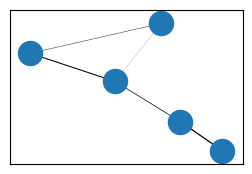

In [ ]:
# Definir la posición de los nodos utilizando un layout
pos = nx.spring_layout(G)

# Representar nodos y ejes
fig, ax = plt.subplots(figsize=(3,2))
nx.draw_networkx_nodes(
    G,
    pos = pos,
    ax = ax
)
nx.draw_networkx_edges(
    G,
    pos = pos,
    edgelist = G.edges,
    width = weights,
    ax = ax
);


Otros tipos de layout

IMAGEN

Representar de forma separada los nodos y ejes permite tener más control sobre las caracteristicas visuales, por ejemplo, el color de los nodos y ejes.

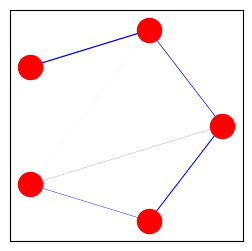

In [ ]:
pos = nx.circular_layout(G)

fig, ax = plt.subplots(figsize=(3,3))
nx.draw_networkx_nodes(G, pos=pos, node_color="red", ax=ax)
nx.draw_networkx_edges(G, pos=pos, edgelist=G.edges, width=weights, edge_color="blue", ax=ax);

#**Grafo bipartito**

Cuando los nodos de un grafo representan entidades de distinta naturaleza se utiliza el termino grafo bipartito. Un ejemplo común de este típo de grafos son las redes de publicaciones donde existen nodos de tipo "artículo" y otros de tipo "escritor".

En este tipo de grafos, las conexiones únicamente puden ocurrir entre nodos de distinta naturaleza, cada escritor está conectado a los artículos que ha escrito. No pueden existir conexiones directas entre artículos o entre escritores.

Para crear un grafo bipartito NetworkX se utiliza el método add_nodes_from() con el que se agregan los nodos indicando el tipo con el argumento bipartite y luego se utiliza el método add_edges_from() para agregar las relaciones entre ellos. A continuación, se muesra un ejemplo de cómo crear un grafo bipartito con dos conjuntos de nodos llamados "grupo A" y "grupo B".

In [ ]:
# Crear un grafo bipartito vacío
G_peliculas_actores = nx.Graph()

# Agregar los nodos de cada grupo
G_peliculas_actores.add_nodes_from(["Pelicula_1", "Pelicula_2", "Pelicula_3"], bipartite="Peliculas")
G_peliculas_actores.add_nodes_from(["Actor_1", "Actor_2", "Actor_3"], bipartite="Actores")

# Agregar las relaciones entre los nodos
G_peliculas_actores.add_edges_from(
    [
        ("Pelicula_1", "Actor_1"),
        ("Pelicula_2", "Actor_2"),
        ("Pelicula_3", "Actor_3"),
        ("Pelicula_2", "Actor_3"),
        ("Pelicula_2", "Actor_1"),
    ]
)

In [ ]:
G_peliculas_actores.nodes(data=True)

NodeDataView({'Pelicula_1': {'bipartite': 'Peliculas'}, 'Pelicula_2': {'bipartite': 'Peliculas'}, 'Pelicula_3': {'bipartite': 'Peliculas'}, 'Actor_1': {'bipartite': 'Actores'}, 'Actor_2': {'bipartite': 'Actores'}, 'Actor_3': {'bipartite': 'Actores'}})

Para acceder al tipo de cada nodo se recorre cada nodo y se accede al attributo "bipartite".

In [ ]:
tipo_nodo = [
    G_peliculas_actores.nodes[i]["bipartite"]
    for i in G_peliculas_actores.nodes()
]
tipo_nodo

['Peliculas', 'Peliculas', 'Peliculas', 'Actores', 'Actores', 'Actores']

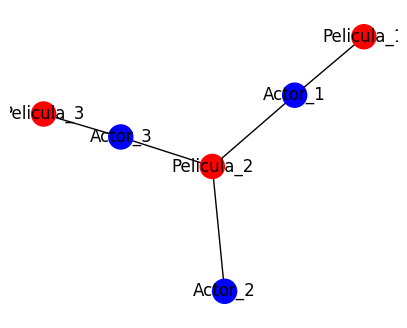

In [ ]:
# colores para cada tipo de nodo en el grafo bipartito
colores = {"Peliculas": "red", "Actores": "blue"}
colores_nodos = [colores[n] for n in tipo_nodo]

fig, ax = plt.subplots(figsize=(5, 4))
nx.draw(
    G_peliculas_actores,
    pos=nx.spring_layout(G_peliculas_actores),
    with_labels=True,
    node_color=colores_nodos,
    ax=ax,
)

En el código anterior se utiliza la función *spring_layout* para posicionar los nodos en el gráfico. Con el argumento *with_labels=True* se muestran las etiquetas de los nodos y con node_colorse asigna el color de cada nodo.

Una vez que creado el grafo bipartito, se puede hacer una proyección de éste para obtener un grafo no bipartito que contenga sólo los nodos de uno de los conjuntos. Para hacer esto, se emplea el método *project()* especificando el conjunto de nodos que se desea incluir en la proyección. A continuación se genera una proyección del grafo bipartito para obtener sólo los nodos del grupo 'Actores'.

(-1.3627689891610706, 1.1521687834289034)

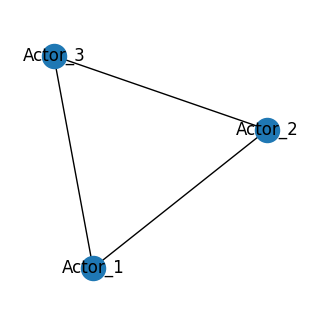

In [ ]:
# Se identifican los nodos del conjunto de interés
nodes_bipartite = [
    n[0]
    for n in G_peliculas_actores.nodes(data=True)
    if n[1]["bipartite"] == "Actores"
]

# Proyección del grafo bipartito para obtener sólo los nodos del grupo A
G_actores = nx.bipartite.projected_graph(G_peliculas_actores, nodes_bipartite)

fig, ax = plt.subplots(figsize=(4, 4))
nx.draw(G_actores, with_labels=True, ax=ax)
ax.set_xlim([1.2 * x for x in ax.get_xlim()])
ax.set_ylim([1.2 * y for y in ax.get_ylim()])

#**Meta-información: atributos de nodos y ejes**

En la mayoría de los problemas de grafos reales, se dispone de información adicional de nodos y ejes. Los atributos de los nodos se añaden con el método networkx.set_node_atributes(Grafo, diccionario, nombre) y los atributos de los ejes se añaden con el método networkx.set_edge_atributes().

In [ ]:
# Creación del grafo
G = nx.Graph()
G.add_edges_from([(1, 2), (2, 3), (1, 4), (1, 5), (4, 2), (5, 4)])
G.edges(data=True)

EdgeDataView([(1, 2, {}), (1, 4, {}), (1, 5, {}), (2, 3, {}), (2, 4, {}), (4, 5, {})])

In [ ]:
# Añadir atributos de los nodos
node_name = {1: "Jaime", 2: "María", 3: "Julio", 4: "Rosa", 5: "Alberto"}

node_aficiones = {
    1: ["Futbol"],
    2: ["Baile", "Pádel"],
    3: ["Golf", "Baile"],
    4: ["Cocina"],
    5: ["Cocina", "Jamón"],
}

nx.set_node_attributes(G, node_name, name="Nombre")
nx.set_node_attributes(G, node_aficiones, name="Aficiones")

# añadir atributos de los ejes
edges_weight = {
    (1, 2): 0.5,
    (2, 3): 0.9,
    (1, 4): 0.1,
    (1, 5): 0.75,
    (4, 2): 0.01,
    (5, 4): 0.3,
}

nx.set_edge_attributes(G, edges_weight, name="weight")

Para acceder a los atributos de nodos y ejes (meta-información) se utiliza G.nodes(data=True) o G.edges(data=True). Estos comandos devuelven una estructura en forma de diccionario donde la clave es el nombre del nodo y el valor contiene todos los atributos.

In [ ]:
G.nodes(data=True)

NodeDataView({1: {'Nombre': 'Jaime', 'Aficiones': ['Futbol']}, 2: {'Nombre': 'María', 'Aficiones': ['Baile', 'Pádel']}, 3: {'Nombre': 'Julio', 'Aficiones': ['Golf', 'Baile']}, 4: {'Nombre': 'Rosa', 'Aficiones': ['Cocina']}, 5: {'Nombre': 'Alberto', 'Aficiones': ['Cocina', 'Jamón']}})

In [ ]:
G.edges(data=True)

EdgeDataView([(1, 2, {'weight': 0.5}), (1, 4, {'weight': 0.1}), (1, 5, {'weight': 0.75}), (2, 3, {'weight': 0.9}), (2, 4, {'weight': 0.01}), (4, 5, {'weight': 0.3})])

Los atributos de ejes y nodos se pueden iterar directamente como si se tratase de un diccionario.

In [ ]:
for m, n, w in G.edges(data=True):
    print(
        f"Eje que conecte el nodo {m} con el nodo {n} y tiene un peso de {w['weight']}."
    )

Eje que conecte el nodo 1 con el nodo 2 y tiene un peso de 0.5.
Eje que conecte el nodo 1 con el nodo 4 y tiene un peso de 0.1.
Eje que conecte el nodo 1 con el nodo 5 y tiene un peso de 0.75.
Eje que conecte el nodo 2 con el nodo 3 y tiene un peso de 0.9.
Eje que conecte el nodo 2 con el nodo 4 y tiene un peso de 0.01.
Eje que conecte el nodo 4 con el nodo 5 y tiene un peso de 0.3.


#**Caso de estudio: círculos sociales de Facebook (Stanford)**

La base de datos "Social circles: Facebook" fue creada por investigadores de la universidad de Stanford en el año 2012. Este conjunto de datos consta de redes de amistad de Facebook. Los datos disponibles incluyen características de nodos (perfiles) y sus conexiones de amistad. Los datos fueron anonimizados reemplazando los nombres y otras identificaciones por un índice numérico. Pueden descargarse de la web de Stanford (https://snap.stanford.edu/data/ego-Facebook.html).

##**Librerías**

In [ ]:
# Librerías
# ==============================================================================
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import networkx as nx
warnings.filterwarnings("ignore")

##**Lectura de los datos**

In [ ]:
# Lectura de datos
# ==============================================================================
facebook = pd.read_csv(
    "https://raw.githubusercontent.com/albreyes/python/main/Grupo%20de%20python/databases/facebook_combined.txt",
    header=None,
    sep=" ",
    names=["user_1", "user_2"],
)

Los datos consisten en una lista de ejes entre usuarios, cada fila es una relacción de amistad. Para reducir los requerimientos computacionales, en este ejemplo se emplean únicamente las 2000 primeras conexiones.

In [ ]:
facebook = facebook[:2000]
facebook.head()

,user_1,user_2
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


Al ser relaciones de amistad y no tener direccionalidad, se representan mediante un grafo no direccional.

In [ ]:
# Creación de grafo
# ==============================================================================
G_facebook = nx.from_pandas_edgelist(facebook, source="user_1", target="user_2", create_using=nx.Graph())

##**Información del grafo**

Se muestra la información sobre la estructura del grafo.

In [ ]:
print("Número de nodos:", G_facebook.number_of_nodes())
print("Número de enlaces:", G_facebook.number_of_edges())

Número de nodos: 713
Número de enlaces: 2000


###**Visualización de la red**

Al visualizar la red se observa que hay tres comunidades de usuarios:

* Dos grandes conjuntos de usuarios altamente conectados.

* Un grupo de unos pocos nodos centrales, algunos de los cuales conectan los otros dos grandes grupos.

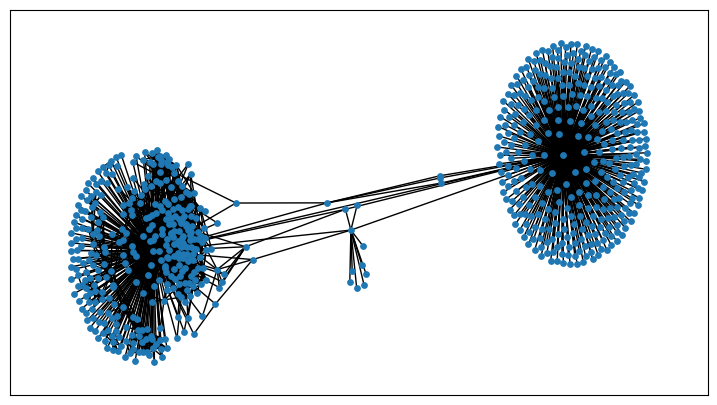

In [ ]:
fig, ax = plt.subplots(figsize=(9, 5))
spring_pos = nx.spring_layout(G_facebook)
nx.draw_networkx(
    G_facebook, pos=spring_pos, with_labels=False, node_size=15, ax=ax
)
